In [2]:
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import shutil

In [6]:
# boards + cords + fields
# for i in range(5150):
#     try:
#         shutil.copy(os.path.join('boards + cords + fields', f'{i}F.txt'), os.path.join('boards+cords+fields', f'{i}F.txt'))
#         shutil.copy(os.path.join('boards + cords + fields', f'{i}.txt'), os.path.join('boards+cords+fields', f'{i}.txt'))
#         shutil.copy(os.path.join('boards + cords + fields', f'{i}.jpg'), os.path.join('boards+cords+fields', f'{i}.jpg'))
#     except:
#         pass

# imgFilesRR = os.listdir('labelren/pictures')
# for idx, imgN in enumerate(imgFilesRR):
#     try:
#         with open(os.path.join('labelren/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
#             cords = f.read().replace('[', '').replace(']', '').split(',')
#             x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
#             cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
#             cords[:, 1] = 168 - cords[:, 1]
#         with open(os.path.join('boards+cords+fields', f'{5150+idx}.txt'), 'w') as f:
#             f.write(str(cords.tolist()))
#         shutil.copy(os.path.join('labelren/lists', f'{imgN.replace("lbrn.jpeg", "list.txt")}'), os.path.join('boards+cords+fields', f'{5150+idx}F.txt'))
#         shutil.copy(os.path.join('labelren/pictures', imgN), os.path.join('boards+cords+fields', f'{5150+idx}.jpg'))
#     except:
#         pass

# imgFilesT = [file for file in os.listdir('boards+cords+fields') if file.endswith('.jpg')]
# for idx, imgN in enumerate(imgFilesT):
#     os.rename(os.path.join('boards+cords+fields', imgN), os.path.join('boards+cords+fields', f'{idx}.jpg'))
#     os.rename(os.path.join('boards+cords+fields', f"{imgN.replace('.jpg', '.txt')}"), os.path.join('boards+cords+fields', f'{idx}.txt'))
#     os.rename(os.path.join('boards+cords+fields', f"{imgN.replace('.jpg', 'F.txt')}"), os.path.join('boards+cords+fields', f'{idx}F.txt'))

In [8]:
# boards + cords
imgFiles0 = [file for file in os.listdir('labelren (pc, pics + cords)') if file.endswith('.jpeg')]
for idx, imgN in enumerate(imgFiles0):
    img = Image.open(os.path.join('labelren (pc, pics + cords)', imgN))
    img.save(os.path.join('boards+cords', f'{idx}.jpg'))
    shutil.copy(os.path.join('labelren (pc, pics + cords)', f"lbrn{imgN.replace('lbrn.jpeg', '.txt')}"), os.path.join('boards+cords', f'{idx}.txt'))

imgFiles1 = [file for file in os.listdir('labelren (laptop, pics + cords)') if file.endswith('.jpeg')]
for idx, imgN in enumerate(imgFiles1):
    img = Image.open(os.path.join('labelren (laptop, pics + cords)', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0)}.jpg'))
    shutil.copy(os.path.join('labelren (laptop, pics + cords)', f"lbrn{imgN.replace('lbrn.jpeg', '')}.txt"), os.path.join('boards+cords', f'{idx + len(imgFiles0)}.txt'))

imgFiles2 = os.listdir('labelren (laptop, pics + cords + fields)/pictures')
for idx, imgN in enumerate(imgFiles2):
    img = Image.open(os.path.join('labelren (laptop, pics + cords + fields)/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1)}.jpg'))
    with open(os.path.join('labelren (laptop, pics + cords + fields)/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

imgFiles3 = os.listdir('labelren (pc, pics + cords + fields)/pictures')
for idx, imgN in enumerate(imgFiles3):
    img = Image.open(os.path.join('labelren (pc, pics + cords + fields)/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2)}.jpg'))
    with open(os.path.join('labelren (pc, pics + cords + fields)/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

imgFiles4 = os.listdir('labelren (anjo, pics + cords + fields)/pictures')
for idx, imgN in enumerate(imgFiles4):
    img = Image.open(os.path.join('labelren (anjo, pics + cords + fields)/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3)}.jpg'))
    with open(os.path.join('labelren (anjo, pics + cords + fields)/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

imgFiles5 = os.listdir('labelren (pc, pics + cords + fields) 1/pictures')
for idx, imgN in enumerate(imgFiles5):
    img = Image.open(os.path.join('labelren (pc, pics + cords + fields) 1/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3) + len(imgFiles4)}.jpg'))
    with open(os.path.join('labelren (pc, pics + cords + fields) 1/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3) + len(imgFiles4)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

[[13.314588367938995, 25.212242603302002], [156.25786542892456, 23.436334133148193], [152.36729907989502, 140.71953999996185], [16.638059377670288, 137.3472865819931]]
[[13.314588367938995, 156.25786542892456, 152.36729907989502, 16.638059377670288], [25.212242603302002, 23.436334133148193, 140.71953999996185, 137.3472865819931]]


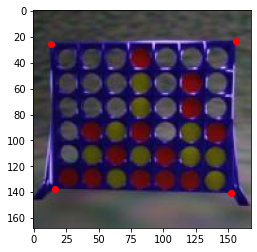

In [9]:
test_img = Image.open('boards + cords + fields/3000.jpg')
coords = open('boards + cords + fields/3000.txt').read()
print(coords)
coords = coords.replace('[', '').replace(']', '').split(',')
x1, y1, x2, y2, x3, y3, x4, y4 = [float(x) for x in coords]
cords = np.array([
    [x1, x2, x3, x4],
    [y1, y2, y3, y4]
])
# cords[:, 1] = 168 - cords[:, 1]
print(cords.tolist())
plt.imshow(test_img)
plt.plot(cords[0], cords[1], 'ro')


In [20]:
def mirror(img, coords):
    img = np.flip(np.array(img), axis=1)
    img = Image.fromarray(img)
    coords[:, 0] = img.width - coords[:, 0]
    return img, coords

In [21]:
mirrorImg, mirrorCords = mirror(test_img.copy(), np.array([top_left, top_right, bottom_right, bottom_left]))

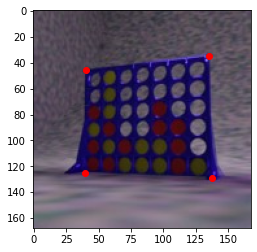

In [24]:
plt.imshow(mirrorImg)
plt.plot(mirrorCords[:, 0], mirrorCords[:, 1], 'ro')

(168, 168)


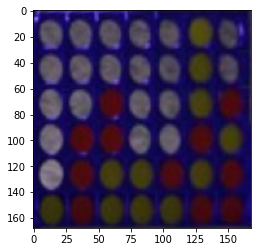

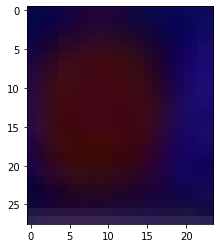

In [22]:
M = cv2.getPerspectiveTransform(np.float32([top_left, bottom_left, bottom_right, top_right]), np.float32([(0, 0), (0, 168), (168, 168), (168, 0)]))
warped = cv2.warpPerspective(np.array(test_img), M, (168, 168))
warped = Image.fromarray(warped)
print(warped.size)
plt.imshow(warped)
plt.show()

for row in range(6):
    for column in range(7):
        cropped = warped.crop((column * (168 / 7), row * (168 / 6), (column + 1) * (168 / 7), (row + 1) * (168 / 6)))
        cropped.save(str(row) + str(column) + '.jpg')
        plt.imshow(cropped)
        